# Clustering - K-Means

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
import numpy as np

## Load data

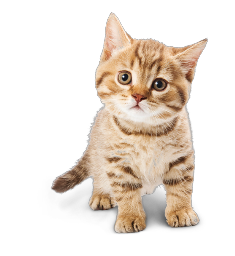

In [2]:
n_colors = [4, 8, 16, 64]
#im=plt.imread("cat.png")[:,:,:3]
im=plt.imread("cat.png")
plt.imshow(im)
plt.axis('off')
plt.show()

## Compress image with K-Means algorithm

In [3]:
def compressionImageKMeans(im, n_colors):
    im_h,im_l,im_d=im.shape
    pixels=np.reshape(im,(im_h*im_l,im_d)) 
    image_array_sample = shuffle(pixels, random_state=0)[:1000]
    for color in n_colors:
        #im = np.array(img, dtype=np.float64) / 255
        kmeans = KMeans(n_clusters=color, random_state=0).fit(image_array_sample)
        labels = kmeans.predict(pixels)
        
        compressed_palette = kmeans.cluster_centers_
        compressed_img = np.zeros((im_h, im_l, im_d))
        label_idx = 0
        for i in range(im_h):
            for j in range(im_l):
                compressed_img[i][j] = compressed_palette[labels[label_idx]]
                label_idx += 1
        
        imnew=compressed_img.reshape((im_h,im_l,im_d))
        plt.imshow(imnew)
        plt.axis('off')
        plt.title("Compressed image with " + str(color) + " colors for each channel of every pixel")
        plt.show()


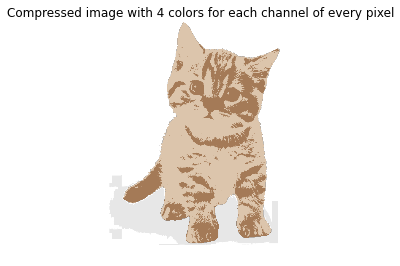

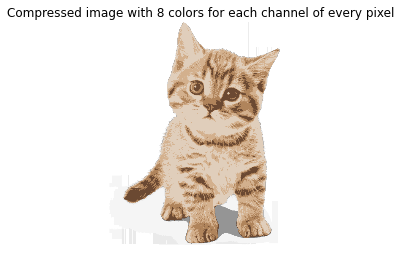

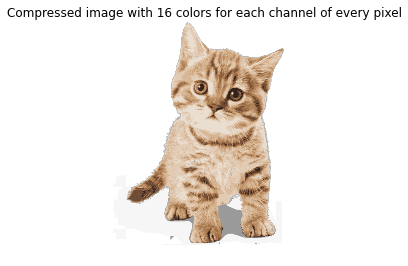

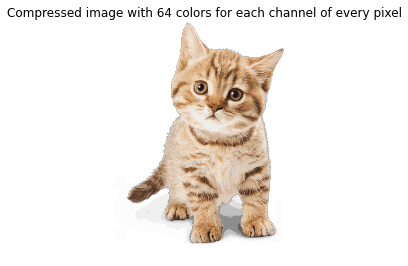

In [4]:
compressionImageKMeans(im, n_colors)